In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
from IPython.display import display, HTML

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [14]:
with open('./benchmark_results.json') as datafile:
  data = json.load(datafile)

dataframe = pd.DataFrame(data).sort_values('size')

groups = dataframe.groupby('name')
names = dataframe['name'].unique();
display(dataframe)

,name,ops,margin,percentSlower,size
0,array methods,6492.0,16.44,7.71,100
1,for loop,7034.0,13.22,0.00,100
2,generators,5060.0,14.51,28.06,100
3,iterators,5563.0,15.24,20.91,100
447,iterators,4936.0,15.64,22.43,110
...,...,...,...,...,...
39955,iterators,4.6,18.36,11.54,99980
39957,for loop,5.1,19.59,0.00,99990
39958,generators,4.5,18.54,11.76,99990
39956,array methods,3.9,19.68,23.53,99990


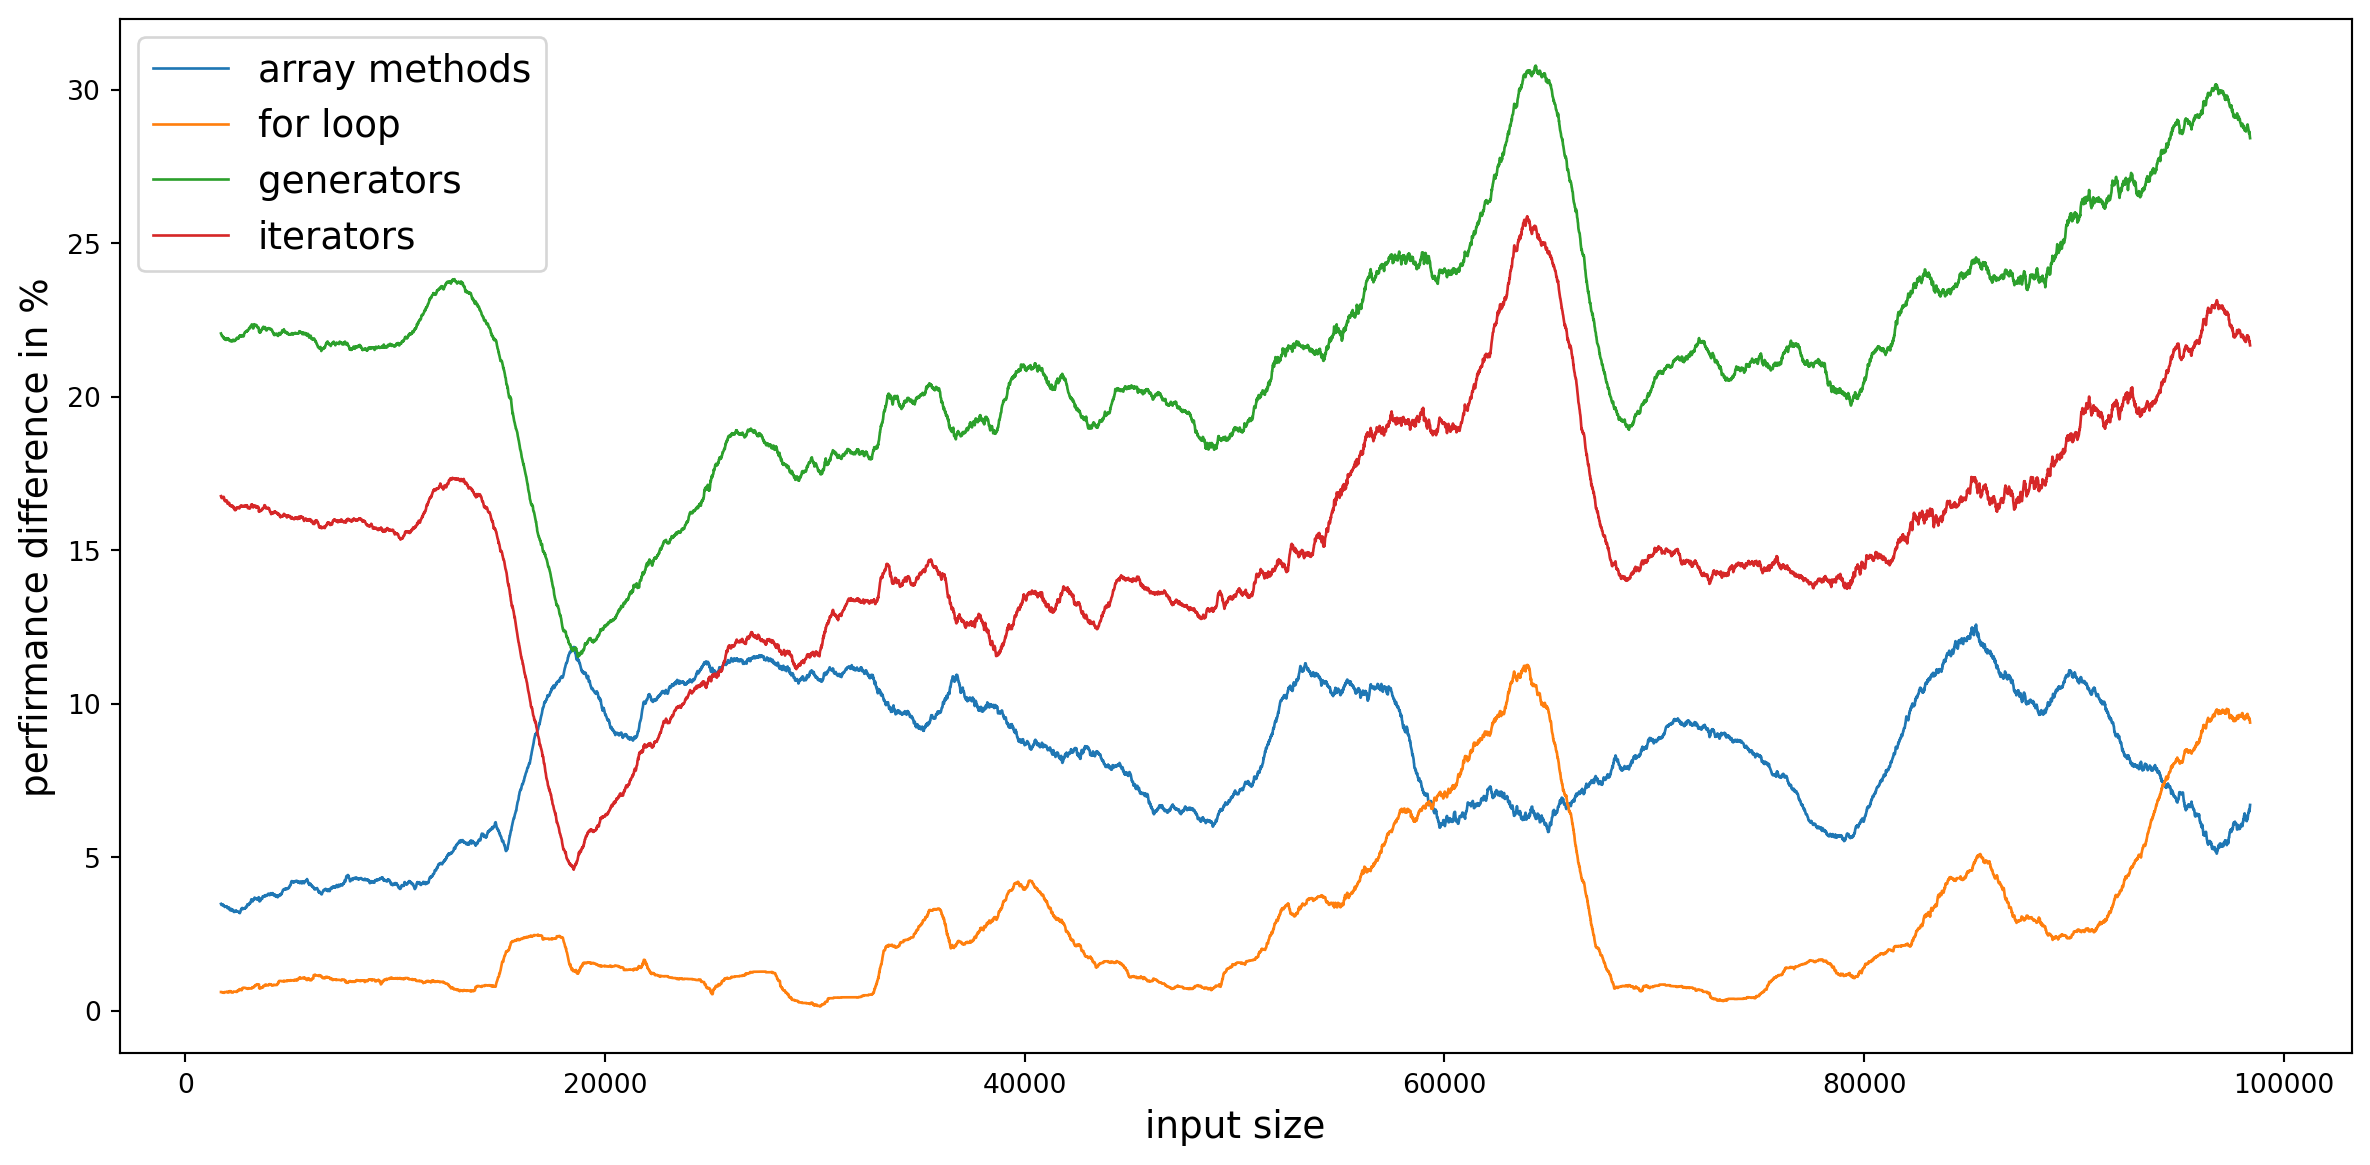

In [18]:
plt.figure(figsize=(15, 7), dpi=96)
ax = plt.gca()

for name in names:
    data = groups.get_group(name)[['size', 'percentSlower']].rolling(320).mean()
    data.plot(kind='line',x='size',y='percentSlower' ,ax=ax, linewidth=1)

current_handles, _ = ax.get_legend_handles_labels()
plt.legend(current_handles, names, prop={'size': 14})


ax.set_xlabel('input size', fontsize=14)
ax.set_ylabel('perfirmance difference in %', fontsize=14)

plt.savefig('diff.png', dpi=1000)
plt.show()

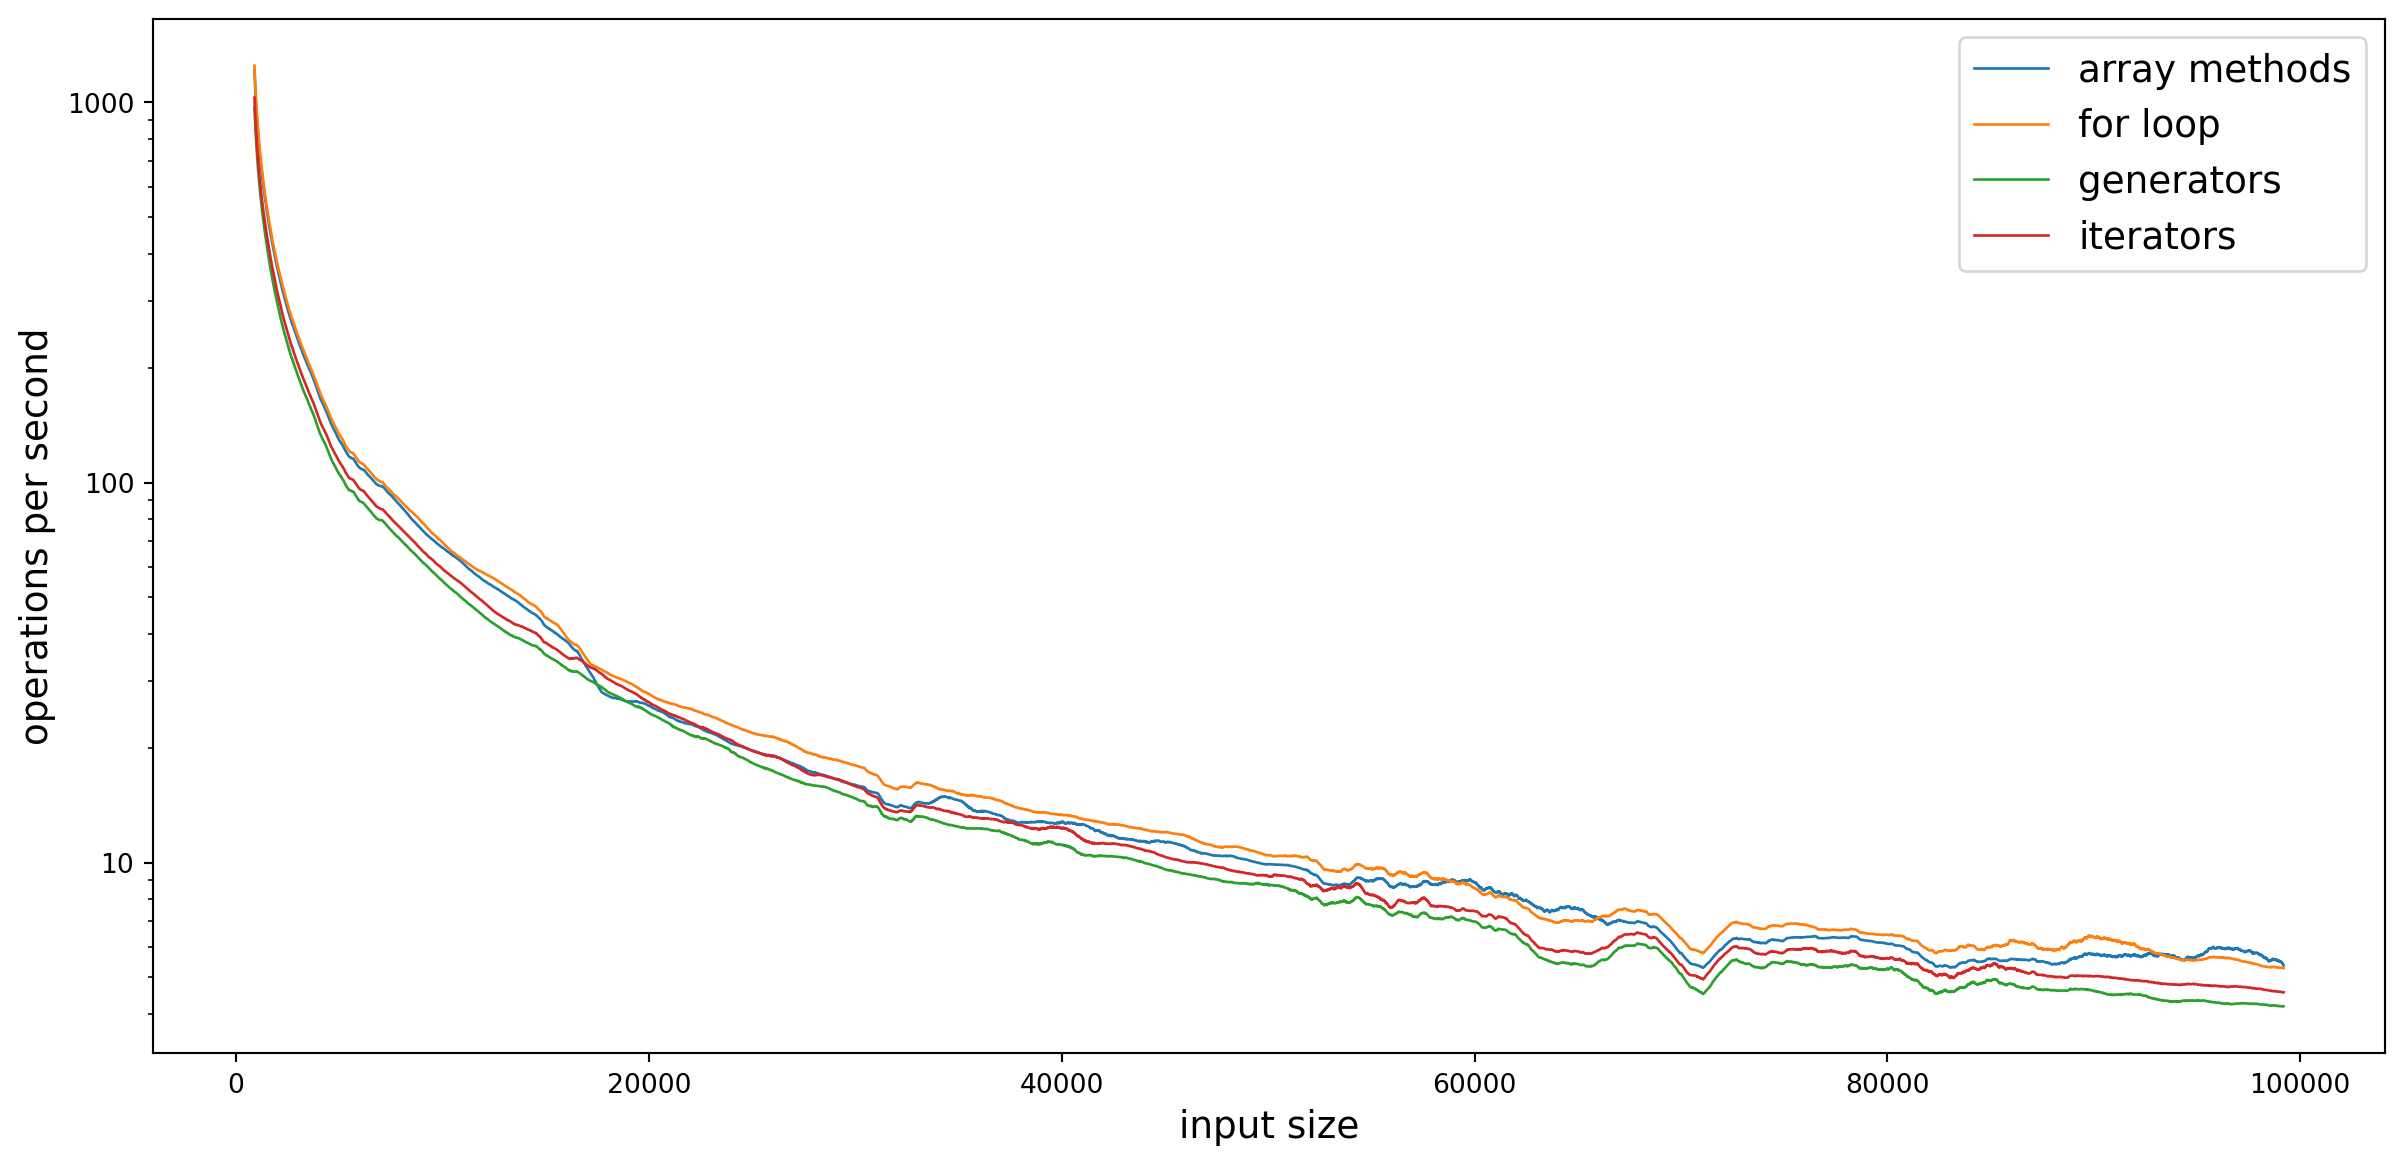

In [20]:
plt.figure(figsize=(15, 7), dpi=96)
ax = plt.gca()

for name in names:
    data = groups.get_group(name)[['size', 'ops']].rolling(160).mean()
    data.plot(kind='line',x='size',y='ops' ,ax=ax, linewidth=1)

current_handles, _ = ax.get_legend_handles_labels()
plt.legend(current_handles, names, prop={'size': 14})

ax.set_xlabel('input size', fontsize=14)
ax.set_ylabel('operations per second', fontsize=14)
ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
plt.savefig('ops.png', dpi=1000)
plt.show()